In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

# Tạo class ImageDataGenerator cho việc truyền dữ liệu vào model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Xử lý các đường dẫn
import os

import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
my_model.summary()

In [ ]:
dense_model = Sequential([
    Flatten(input_shape=(7, 7 ,512)),
    Dense(4096),
    Dense(4096),
    Dense(1,activation='softmax')
])
dense_model.summary()

In [ ]:
merged_model = Sequential([my_model,dense_model])

In [ ]:
merged_model.summary()
merged_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = merged_model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 19s 1s/step - loss: 0.8138 - accuracy: 0.4995 - val_loss: 0.8166 - val_accuracy: 0.4967
Epoch 2/15
15/15 [==============================] - 18s 1s/step - loss: 0.8138 - accuracy: 0.4995 - val_loss: 0.8278 - val_accuracy: 0.4855
Epoch 3/15
15/15 [==============================] - 18s 1s/step - loss: 0.8127 - accuracy: 0.5005 - val_loss: 0.8043 - val_accuracy: 0.5089
Epoch 4/15
15/15 [==============================] - 18s 1s/step - loss: 0.8154 - accuracy: 0.4979 - val_loss: 0.8088 - val_accuracy: 0.5045
Epoch 5/15
15/15 [==============================] - 18s 1s/step - loss: 0.8138 - accuracy: 0.4995 - val_loss: 0.8121 - val_accuracy: 0.5011
Epoch 6/15
15/15 [==============================] - 18s 1s/step - loss: 0.8143 - accuracy: 0.4989 - val_loss: 0.8110 - val_accuracy: 0.5022
Epoch 7/15
15/15 [==============================] - 18s 1s/step - loss: 0.8143 - accuracy: 0.4989 - val_loss: 0.8099 - val_accuracy: 0.5033
Epoch 8/15
15/15 [==

In [ ]:
my_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_tensor=None,
    input_shape=(4128,2322,3),
    pooling="Max",
)

for layer in my_model.layers[:-4]:
    layer.trainable = False


In [ ]:
model = models.Sequential()
model.add(my_model)
model.add(layers.Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='softmax'))

In [ ]:
dense_model = Sequential([
    Flatten(),
    Dense(2048,activation='relu'),
    Dense(1024,activation='relu'),
    Dropout(0.5),
    Dense(32,activation='softmax')
])

merged_model = Sequential([my_model,dense_model])

In [ ]:
dense_model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_63 (Dense)             (None, 2048)              51382272  
_________________________________________________________________
dense_64 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_65 (Dense)             (None, 32)                32800     
Total params: 53,513,248
Trainable params: 53,513,248
Non-trainable params: 0
_________________________________________________________________


---------------------------------
Dữ liệu chưa phân chia thành train và test

In [ ]:
!wget "https://storage.googleapis.com/kagglesdsdata/competitions/3362/31148/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1591788358&Signature=Jf075VZuvjj22e7q9OCncSAOvq66JISX3Rl7AoL3VPvFeFKhYlzThUBZrXTImMYd06O%2FWj3INUAh5h6sitPba64ubFVB2Mla%2FGSmvkMBpRceDjWaN%2Bhx84TojspOgN1I7S%2FxanaAG6lkNPxOE2o0G90eDguWPEbnvf7830iLqgRKS65JH97dq%2BC8UShVu4qEMVb4fM7L1kuLVJgusoEPOyWBb3B1hIjLwvnEqlc3b9Enpm%2BmsgrVA0smtwkuOb9WWJH48dJw4Y9xa%2B3GLiNbllukDXF%2F%2Bjx8vmoJcpOKWTh8Ry46pqhS0gRnlY9n7QZjoQa2LF7cvKeu%2FzfdcBUgIQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.zip" -O "train.zip"
!wget "https://storage.googleapis.com/kagglesdsdata/competitions/3362/31148/test1.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1591788592&Signature=VsSjl5BQutplb06b5bCL%2FuSxn9HF2nmjiytUJPTMlVI9SA%2BLulyofNy7lQSFII0JMon98LoQO4HhvSJMQLmqjRGFKt0PkwQDAEjEuGNYtbLvUFzz7UZWNH9K%2FqNxgrLLNQwAhGc8kauFAKtNDeXbJAZDmuqpwb9wFKKPrvAiKTKpeAdYZtOY6U4w5Lra%2FEKwHpwW0DwhQ96ejJIRejFRBcwjUtXBzJSX6Jt0JB3JbLLAUFOxoossF%2Bf9wDRiI69C92e5Ij2ikUKOJXrjuBIRJ3UYTGUL3cWWixVzegAjX9PEtMhYjGzZ76aqok7zg5KFVw1AvE9mL9uvn55Ld74ttg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest1.zip" -O "test.zip"

--2020-06-07 11:30:25--  https://storage.googleapis.com/kagglesdsdata/competitions/3362/31148/test1.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1591788592&Signature=VsSjl5BQutplb06b5bCL%2FuSxn9HF2nmjiytUJPTMlVI9SA%2BLulyofNy7lQSFII0JMon98LoQO4HhvSJMQLmqjRGFKt0PkwQDAEjEuGNYtbLvUFzz7UZWNH9K%2FqNxgrLLNQwAhGc8kauFAKtNDeXbJAZDmuqpwb9wFKKPrvAiKTKpeAdYZtOY6U4w5Lra%2FEKwHpwW0DwhQ96ejJIRejFRBcwjUtXBzJSX6Jt0JB3JbLLAUFOxoossF%2Bf9wDRiI69C92e5Ij2ikUKOJXrjuBIRJ3UYTGUL3cWWixVzegAjX9PEtMhYjGzZ76aqok7zg5KFVw1AvE9mL9uvn55Ld74ttg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest1.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 284321224 (271M) [application/zip]
Saving to: ‘test.zip’

test.zip            100%[===================>] 271.15M  54.1MB/s    in 5.0s

In [ ]:
!unzip "/content/train.zip" -d "train"
!unzip "/content/test.zip" -d "test"
train_dirs =["train/train/"+ x for x in os.listdir("train/train/")]
test_dirs = ["test/test1/" + x for x in os.listdir("test/test1/")]

cat_train_dirs = []
for x in train_dirs:
  if "cat" in x:
    cat_train_dirs.append(x)

dog_train_dirs = []
for x in train_dirs:
  if "dog" in x:
    dog_train_dirs.append(x)

len(cat_train_dirs) + len(dog_train_dirs)

In [ ]:
cat_label = np.zeros(shape = len(cat_train_dirs),dtype=np.int8)
dog_label = np.ones(shape = len(dog_train_dirs),dtype=np.int8)
label = np.hstack((cat_label,dog_label))
sort_img_dirs = np.hstack((cat_train_dirs,dog_train_dirs))

--------------------------------- Dùng tập dữ liệu này vì đã chia thành tập train và test:

In [ ]:
!wget "https://storage.googleapis.com/kaggle-data-sets/22535%2F28903%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1591790708&Signature=JmktTXSJM3bG9VHs9MTzmMZ45saau19mCdD%2FpcqGcaJUhGk7Tu1VDcPcTI62z4LKhLUA7ah6GM7UybsZuqeGx51SQkyZ1FOi4lwo%2BFEwyG1dS5bUpuShNCr9w5RlW4hz2jQ%2F2y8fl5PAxIp%2Fji8NkFx1M0BlYbx3wkForcHQIWwpamVXEXiTN%2FdHapTxq0TT3FQfNTLfZO17sS%2BIMZcPl0fhfiiU%2FskrFIG1HL8ukczAbNRrubf0O0XA%2FYD9FnOCfA6JdW3aQyJR8pS%2FyPzJlPybeD1TxtmACxracnpdffcCzKD1KU0ZeHpzD6jThPj4uhVU%2F5EhA6UpUlj14QZj3A%3D%3D" -O "data.zip"

--2020-06-07 12:05:28--  https://storage.googleapis.com/kaggle-data-sets/22535%2F28903%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1591790708&Signature=JmktTXSJM3bG9VHs9MTzmMZ45saau19mCdD%2FpcqGcaJUhGk7Tu1VDcPcTI62z4LKhLUA7ah6GM7UybsZuqeGx51SQkyZ1FOi4lwo%2BFEwyG1dS5bUpuShNCr9w5RlW4hz2jQ%2F2y8fl5PAxIp%2Fji8NkFx1M0BlYbx3wkForcHQIWwpamVXEXiTN%2FdHapTxq0TT3FQfNTLfZO17sS%2BIMZcPl0fhfiiU%2FskrFIG1HL8ukczAbNRrubf0O0XA%2FYD9FnOCfA6JdW3aQyJR8pS%2FyPzJlPybeD1TxtmACxracnpdffcCzKD1KU0ZeHpzD6jThPj4uhVU%2F5EhA6UpUlj14QZj3A%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 455718914 (435M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>] 434.61M  45.7MB/s    in 13s     

2020-06-07 12:05:42 (32.4 MB/s) - 

In [ ]:
train_dir = "/content/dataset/training_set"
validate_dir = "/content/dataset/test_set"
nb_epochs = 2
batch_size = 128
nb_classes = len(glob.glob(train_dir + '/*'))

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_data_gen = train_datagen.flow_from_directory(batch_size=128,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode="categorical")
test_data_gen = test_datagen.flow_from_directory(batch_size=128,
                                                           directory=validate_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode="categorical")

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
#Load the VGG model
vgg16_model  = VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))

# freeze all layers of the pre-trained model
for layer in vgg16_model.layers:
    layer.trainable = False


model_1 = models.Sequential()
model_1.add(vgg16_model)
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(2, activation='softmax'))


# # model = Model(input = vgg16_model.input, output = predictions)


# # Show a summary of the model. Check the number of trainable parameters
# model.summary()

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False,name='categorical_crossentropy'),
#               metrics=['accuracy'])

In [ ]:
#Load the VGG model
vgg16_model  = VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))

# freeze all layers of the pre-trained model
for layer in vgg16_model.layers:
    layer.trainable = False


model = models.Sequential()
model.add(vgg16_model)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))


# model = Model(input = vgg16_model.input, output = predictions)


# Show a summary of the model. Check the number of trainable parameters
model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False,name='categorical_crossentropy'),
              metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dense_26 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 514       
Total params: 21,203,778
Trainable params: 6,489,090
Non-trainable params: 14,714,688
_________________________________

In [ ]:
model.load_weights("/content/dogsandcat_vgg16_model_tl.h5")

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= 8000 // 128,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps= 2000 // 128
)

Epoch 1/15
62/62 [==============================] - 132s 2s/step - loss: 0.6259 - accuracy: 0.7322
Epoch 2/15
62/62 [==============================] - 132s 2s/step - loss: 0.3125 - accuracy: 0.8598
Epoch 3/15
62/62 [==============================] - 132s 2s/step - loss: 0.2662 - accuracy: 0.8869
Epoch 4/15
62/62 [==============================] - 132s 2s/step - loss: 0.2467 - accuracy: 0.8962
Epoch 5/15
62/62 [==============================] - 132s 2s/step - loss: 0.2566 - accuracy: 0.8848
Epoch 6/15
62/62 [==============================] - 132s 2s/step - loss: 0.2514 - accuracy: 0.8885
Epoch 7/15
62/62 [==============================] - 132s 2s/step - loss: 0.2447 - accuracy: 0.8948
Epoch 8/15
62/62 [==============================] - 132s 2s/step - loss: 0.2396 - accuracy: 0.8998
Epoch 9/15
62/62 [==============================] - 132s 2s/step - loss: 0.2241 - accuracy: 0.9040
Epoch 10/15
62/62 [==============================] - 130s 2s/step - loss: 0.2237 - accuracy: 0.9070
Epoch 11/

In [ ]:
# model.save('dogsandcat_vgg16_model_tl.h5')
# !cp "/content/dogsandcat_vgg16_model_tl.h5" "/content/drive/My Drive/vgg16_cats_dogs"

In [ ]:
sample_training_images, sample_training_labels = next(test_data_gen)

In [ ]:
predict_labels = model.predict(sample_training_images)
predict_labels = np.round(predict_labels)

In [ ]:
np.mean(sample_training_labels[:,0] == predict_labels[:,0])
#np.mean(sample_training_labels[:,1] == predict_labels[:,1]) #tương đương

0.90625

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

KeyError: ignored

In [ ]:
model.layers

In [ ]:
from tensorflow import keras

extractor = Model(model.layers[0].layers[0],
                        outputs=[layer.output for layer in model.layers[0].layers])
features = extractor(data)

AttributeError: ignored

In [ ]:
extractor = models.Sequential()
for layer in model.layers[0].layers:
  extractor.add(layer)

In [ ]:
sample_training_images, sample_training_labels = next(test_data_gen)
extractor_predict = extractor.predict(sample_training_images)

In [ ]:
vgg16_feature_list_np  = np.array(extractor_predict)
feat_vec_1 = vgg16_feature_list_np[0].flatten()
feat_vec_2 = vgg16_feature_list_np[1].flatten()
feat = vgg16_feature_list_np[0:2].flatten()

In [ ]:
flatten_shape = 7*7*512

In [ ]:
print((feat_vec_1[0:] - feat[0:flatten_shape]).sum())
print((feat_vec_2[0:] - feat[flatten_shape:]).sum())

0.0
0.0


In [ ]:
feat = vgg16_feature_list_np[0:].flatten().reshape((-1,7*7*512))

In [ ]:
feat.shape

(128, 25088)

In [ ]:
pred = np.argmax(sample_training_labels,axis = 1)

In [ ]:
pred.shape

(128,)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(feat,pred)

In [ ]:
kmeans_pred = kmeans.predict(feat)

In [ ]:
np.mean(pred == kmeans_pred)

0.953125

In [ ]:
from sklearn.linear_model import LogisticRegression

logis = LogisticRegression().fit(feat,pred)

In [ ]:
logis.score(feat,pred)

1.0

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , y_train , y_test  = train_test_split(feat,pred)

In [ ]:
logis = LogisticRegression().fit(X_train,y_train)

In [ ]:
logis.score(X_test,y_test)

0.96875

In [ ]:
#Load the VGG model
vgg16_model  = VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))

# # freeze all layers of the pre-trained model
# for layer in vgg16_model.layers:
#     layer.trainable = False


model = models.Sequential()
model.add(vgg16_model)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))


# model = Model(input = vgg16_model.input, output = predictions)


# Show a summary of the model. Check the number of trainable parameters
model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False,name='categorical_crossentropy'),
              metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 514       
Total params: 21,203,778
Trainable params: 21,203,778
Non-trainable params: 0
_________________________________________

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_data_gen = train_datagen.flow_from_directory(batch_size=64,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode="categorical")
test_data_gen = test_datagen.flow_from_directory(batch_size=64,
                                                           directory=validate_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode="categorical")

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= 8000 // 64,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps= 2000 // 64
)

Epoch 1/15
125/125 [==============================] - 221s 2s/step - loss: 0.6895 - accuracy: 0.5264 - val_loss: 0.7044 - val_accuracy: 0.5101
Epoch 2/15
125/125 [==============================] - 222s 2s/step - loss: 0.6818 - accuracy: 0.5475 - val_loss: 0.6933 - val_accuracy: 0.5997
Epoch 3/15
125/125 [==============================] - 221s 2s/step - loss: 0.6911 - accuracy: 0.5552 - val_loss: 0.6835 - val_accuracy: 0.6038
Epoch 4/15
125/125 [==============================] - 222s 2s/step - loss: 0.6649 - accuracy: 0.6043 - val_loss: 0.6504 - val_accuracy: 0.6436
Epoch 5/15
125/125 [==============================] - 221s 2s/step - loss: 0.6685 - accuracy: 0.5953 - val_loss: 0.7481 - val_accuracy: 0.6281
Epoch 6/15
125/125 [==============================] - 222s 2s/step - loss: 0.6410 - accuracy: 0.6359 - val_loss: 0.6420 - val_accuracy: 0.5780
Epoch 7/15
125/125 [==============================] - 222s 2s/step - loss: 0.6014 - accuracy: 0.6759 - val_loss: 0.5863 - val_accuracy: 0.7221

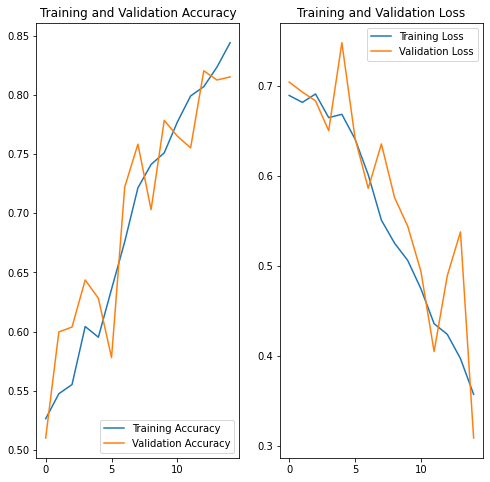

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('dogsandcat_from_beginning_vgg16_model_tl.h5')

In [ ]:
!cp "/content/dogsandcat_from_beginning_vgg16_model_tl.h5" "/content/drive/My Drive/vgg16_cats_dogs"

In [ ]:
model_json = model.to_json()
with open("model_cat_dog_from_beginning.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
keras.backend.clear_session()

In [ ]:
keras.cuda.clear_cache()

AttributeError: ignored

In [ ]:
model_json

'{"class_name": "Sequential", "config": {"name": "sequential_13", "layers": [{"class_name": "Model", "config": {"name": "vgg16", "layers": [{"name": "input_14", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 224, 224, 3], "dtype": "float32", "sparse": false, "name": "input_14"}, "inbound_nodes": []}, {"name": "block1_conv1", "class_name": "Conv2D", "config": {"name": "block1_conv1", "trainable": true, "dtype": "float32", "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "inbound_nodes": [[["input_14", 0, 0, {}]]]

In [ ]:
!cp "model.json" "/content/drive/My Drive/vgg16_cats_dogs"
!cp "model_cat_dog_from_beginning.json" "/content/drive/My Drive/vgg16_cats_dogs"

In [ ]:
json_file = open('model_cat_dog_from_beginning.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

In [ ]:
from keras.models import model_from_json
loaded_model = model_from_json(loaded_model_json)

In [ ]:
loaded_model.load_weights("/content/dogsandcat_from_beginning_vgg16_model_tl.h5")
loaded_model.summary()

loaded_model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False,name='categorical_crossentropy'),
              metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 514       
Total params: 21,203,778
Trainable params: 21,203,778
Non-trainable params: 0
_________________________________________

In [ ]:
history_2 = loaded_model.fit_generator(
    train_data_gen,
    steps_per_epoch= 8000 // 64,
    epochs=10,
    validation_data=test_data_gen,
    validation_steps= 2000 // 64
)

Epoch 1/10
125/125 [==============================] - 223s 2s/step - loss: 0.3258 - accuracy: 0.8636 - val_loss: 0.2793 - val_accuracy: 0.8518
Epoch 2/10
125/125 [==============================] - 222s 2s/step - loss: 0.3039 - accuracy: 0.8719 - val_loss: 0.5156 - val_accuracy: 0.8595
Epoch 3/10
125/125 [==============================] - 222s 2s/step - loss: 0.3091 - accuracy: 0.8674 - val_loss: 0.2270 - val_accuracy: 0.8652
Epoch 4/10
125/125 [==============================] - 222s 2s/step - loss: 0.3861 - accuracy: 0.8306 - val_loss: 0.3715 - val_accuracy: 0.8456
Epoch 5/10
125/125 [==============================] - 221s 2s/step - loss: 0.3504 - accuracy: 0.8540 - val_loss: 0.4808 - val_accuracy: 0.8528
Epoch 6/10
125/125 [==============================] - 221s 2s/step - loss: 0.2839 - accuracy: 0.8838 - val_loss: 0.2453 - val_accuracy: 0.8812
Epoch 7/10
125/125 [==============================] - 221s 2s/step - loss: 0.3475 - accuracy: 0.8875 - val_loss: 0.6924 - val_accuracy: 0.6281

In [ ]:
model.save('/content/drive/My Drive/vgg16_cats_dogs/dogsandcat_from_beginning_vgg16_model_checkpoint_2_tl.h5')

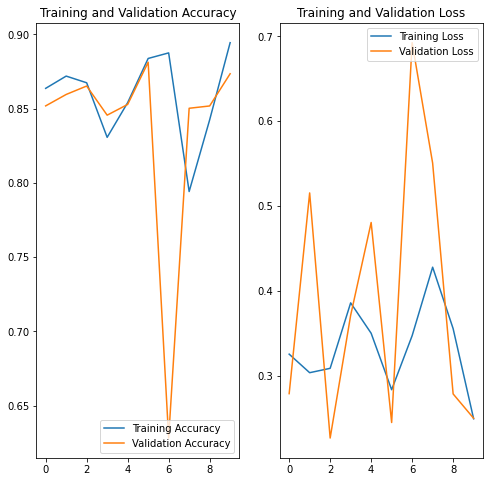

In [ ]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss=history_2.history['loss']
val_loss=history_2.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def plot_history(history,plot_args = ("accuracy","loss")):
  i = 0
  k = 0
  Flag_acc = 0
  Flag_loss = 0
  if "accuracy" in plot_args:
    try:
      acc = history.history['accuracy']
      val_acc = history.history['val_accuracy']
      epochs_range = range(len(history.history["accuracy"]))
      i +=1
      Flag_acc = 1

    except:
      pass
  if "loss" in plot_args:
    try:
      loss=history.history['loss']
      val_loss=history.history['val_loss']
      epochs_range = range(len(history.history["accuracy"]))
      i+=1
      Flag_loss = 1
    except:
      pass

  plt.figure(figsize=(8, 8))

  
  if Flag_acc == 1:
    plt.subplot(1, i, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='best')
    plt.title('Training and Validation Accuracy')
  if Flag_loss == 1:
    plt.subplot(1, i, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='best')
    plt.title('Training and Validation Loss')
  plt.show()

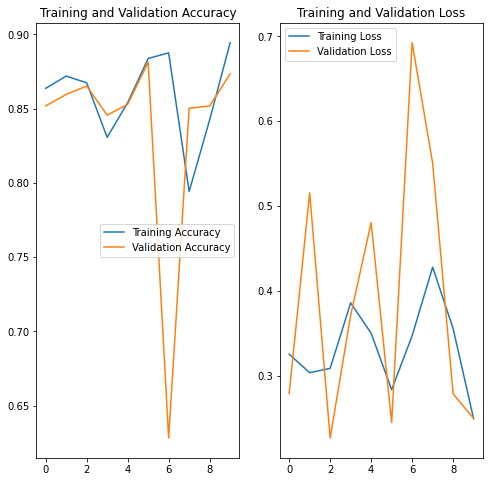

In [ ]:
plot_history(history_2)